# Neuro to predict trands =)

# Data preparing

In [1]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd

api = 
secret = 

client = Client(api, secret)

In [2]:
tickers = client.get_all_tickers()
df = pd.DataFrame(tickers)
df

,symbol,price
0,ETHBTC,0.06693600
1,LTCBTC,0.00288500
2,BNBBTC,0.01130400
3,NEOBTC,0.00033600
4,QTUMETH,0.00140400
...,...,...
2212,RNDRTRY,36.59000000
2213,PEPEUSDT,0.00000196
2214,PEPETUSD,0.00000195
2215,FLOKIUSDT,0.00003549


In [8]:
from datetime import datetime, timedelta
gmt_time_delta = (datetime.utcnow() - timedelta(days=30)).strftime("%d %b %Y %H:%M:%S")
gmt_time_now = datetime.utcnow().strftime("%d %b %Y %H:%M:%S")
gmt_time_delta, gmt_time_now


('09 Apr 2023 20:00:22', '09 May 2023 20:00:22')

In [4]:
klines = client.get_historical_klines('BTCUSDT', Client.KLINE_INTERVAL_1MINUTE, gmt_time_delta, gmt_time_now)
klines

[[1675886040000,
  '22867.37000000',
  '22868.87000000',
  '22859.48000000',
  '22863.93000000',
  '181.48733000',
  1675886099999,
  '4149615.58439640',
  3877,
  '93.12407000',
  '2129246.71720050',
  '0'],
 [1675886100000,
  '22863.93000000',
  '22875.68000000',
  '22859.26000000',
  '22873.75000000',
  '140.13287000',
  1675886159999,
  '3204498.61484800',
  3970,
  '80.65303000',
  '1844385.94149950',
  '0'],
 [1675886160000,
  '22874.35000000',
  '22884.16000000',
  '22867.26000000',
  '22882.00000000',
  '219.83471000',
  1675886219999,
  '5028878.48427870',
  5047,
  '121.49238000',
  '2779312.80552550',
  '0'],
 [1675886220000,
  '22881.15000000',
  '22884.45000000',
  '22876.93000000',
  '22879.46000000',
  '125.86640000',
  1675886279999,
  '2879832.24993810',
  3606,
  '64.41686000',
  '1473898.90381900',
  '0'],
 [1675886280000,
  '22880.37000000',
  '22882.46000000',
  '22871.69000000',
  '22875.77000000',
  '160.95883000',
  1675886339999,
  '3682303.63178690',
  3890,
 

In [5]:
import matplotlib.pyplot as plt


df = pd.DataFrame(klines, columns=['time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'])

df['time'] = pd.to_datetime(df['time'], unit='ms')
df.set_index('time', inplace=True)
df = df.tz_localize('UTC').tz_convert('Etc/GMT-3')
df.index = (df.index).strftime('%Y-%m-%d %H:%M:%S')
df = df.astype(float)
df.index = pd.to_datetime(df.index)

df

,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
time,,,,,,,,,,,
2023-02-08 22:54:00,22867.37,22868.87,22859.48,22863.93,181.48733,1.675886e+12,4.149616e+06,3877.0,93.12407,2.129247e+06,0.0
2023-02-08 22:55:00,22863.93,22875.68,22859.26,22873.75,140.13287,1.675886e+12,3.204499e+06,3970.0,80.65303,1.844386e+06,0.0
2023-02-08 22:56:00,22874.35,22884.16,22867.26,22882.00,219.83471,1.675886e+12,5.028878e+06,5047.0,121.49238,2.779313e+06,0.0
2023-02-08 22:57:00,22881.15,22884.45,22876.93,22879.46,125.86640,1.675886e+12,2.879832e+06,3606.0,64.41686,1.473899e+06,0.0
2023-02-08 22:58:00,22880.37,22882.46,22871.69,22875.77,160.95883,1.675886e+12,3.682304e+06,3890.0,79.85277,1.826849e+06,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-09 22:49:00,27595.56,27601.04,27592.89,27598.97,9.33764,1.683662e+12,2.576794e+05,597.0,6.04543,1.668245e+05,0.0
2023-05-09 22:50:00,27598.97,27604.77,27595.36,27604.76,10.74475,1.683662e+12,2.965405e+05,461.0,5.64874,1.558927e+05,0.0
2023-05-09 22:51:00,27604.76,27609.32,27594.29,27609.32,32.96329,1.683662e+12,9.098009e+05,759.0,24.99774,6.899324e+05,0.0


In [6]:
ba_df = df.iloc[:, :5].copy()
ba_df.rename(columns={ba_df.columns[0]: 'Open', ba_df.columns[1]: 'High', ba_df.columns[2]: 'Low', ba_df.columns[3]: 'Close', ba_df.columns[4]: 'Volume'}, inplace=True)
ba_df

,Open,High,Low,Close,Volume
time,,,,,
2023-02-08 22:54:00,22867.37,22868.87,22859.48,22863.93,181.48733
2023-02-08 22:55:00,22863.93,22875.68,22859.26,22873.75,140.13287
2023-02-08 22:56:00,22874.35,22884.16,22867.26,22882.00,219.83471
2023-02-08 22:57:00,22881.15,22884.45,22876.93,22879.46,125.86640
2023-02-08 22:58:00,22880.37,22882.46,22871.69,22875.77,160.95883
...,...,...,...,...,...
2023-05-09 22:49:00,27595.56,27601.04,27592.89,27598.97,9.33764
2023-05-09 22:50:00,27598.97,27604.77,27595.36,27604.76,10.74475
2023-05-09 22:51:00,27604.76,27609.32,27594.29,27609.32,32.96329


In [7]:
import mplfinance as mpf

mpf.plot(df, type='candle', volume=True, style='yahoo')

c:\dev\conda\lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


KeyboardInterrupt: 

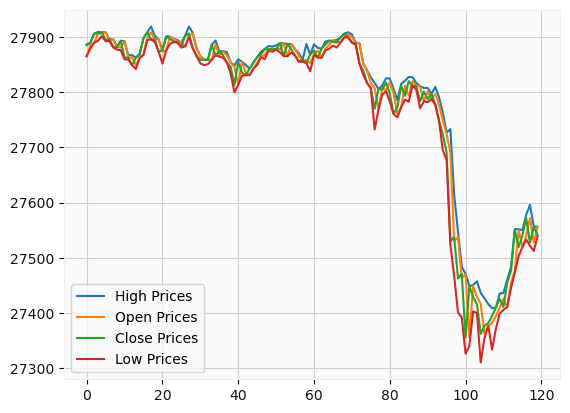

In [ ]:
open_prices = [float(x[1]) for x in klines]
high_prices = [float(x[2]) for x in klines]
low_prices = [float(x[3]) for x in klines]
close_prices = [float(x[4]) for x in klines]

plt.plot(high_prices, label='High Prices')
plt.plot(open_prices, label='Open Prices')
plt.plot(close_prices, label='Close Prices')
plt.plot(low_prices, label='Low Prices')

plt.legend()
plt.show()

In [9]:
klines_futures = client.futures_historical_klines('BTCUSDT', Client.KLINE_INTERVAL_1MINUTE, gmt_time_delta, gmt_time_now)
klines_futures

[[1681070460000,
  '28131.70',
  '28131.70',
  '28128.00',
  '28129.60',
  '116.894',
  1681070519999,
  '3288135.35850',
  1120,
  '29.576',
  '831948.05230',
  '0'],
 [1681070520000,
  '28129.50',
  '28144.10',
  '28129.50',
  '28139.00',
  '276.701',
  1681070579999,
  '7786152.92070',
  2437,
  '133.472',
  '3755641.50780',
  '0'],
 [1681070580000,
  '28139.00',
  '28149.90',
  '28138.90',
  '28146.60',
  '291.525',
  1681070639999,
  '8204763.35100',
  2172,
  '210.142',
  '5914314.50050',
  '0'],
 [1681070640000,
  '28146.50',
  '28149.70',
  '28127.90',
  '28127.90',
  '129.835',
  1681070699999,
  '3653959.77650',
  1784,
  '67.419',
  '1897542.30810',
  '0'],
 [1681070700000,
  '28127.50',
  '28127.50',
  '28118.00',
  '28118.10',
  '182.836',
  1681070759999,
  '5141466.14720',
  1620,
  '68.305',
  '1920757.48190',
  '0'],
 [1681070760000,
  '28118.10',
  '28119.90',
  '28117.60',
  '28117.60',
  '81.990',
  1681070819999,
  '2305458.71100',
  1019,
  '39.577',
  '1112856.64

In [10]:
df = pd.DataFrame(klines_futures, columns=['time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'])

df['time'] = pd.to_datetime(df['time'], unit='ms')
df.set_index('time', inplace=True)

df = df.tz_localize('UTC').tz_convert('Etc/GMT-3')
df.index = (df.index).strftime('%Y-%m-%d %H:%M:%S')


df = df.astype(float)

df.index = pd.to_datetime(df.index)

df

,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
time,,,,,,,,,,,
2023-04-09 23:01:00,28131.7,28131.7,28128.0,28129.6,116.894,1.681071e+12,3.288135e+06,1120.0,29.576,8.319481e+05,0.0
2023-04-09 23:02:00,28129.5,28144.1,28129.5,28139.0,276.701,1.681071e+12,7.786153e+06,2437.0,133.472,3.755642e+06,0.0
2023-04-09 23:03:00,28139.0,28149.9,28138.9,28146.6,291.525,1.681071e+12,8.204763e+06,2172.0,210.142,5.914315e+06,0.0
2023-04-09 23:04:00,28146.5,28149.7,28127.9,28127.9,129.835,1.681071e+12,3.653960e+06,1784.0,67.419,1.897542e+06,0.0
2023-04-09 23:05:00,28127.5,28127.5,28118.0,28118.1,182.836,1.681071e+12,5.141466e+06,1620.0,68.305,1.920757e+06,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-09 22:56:00,27644.7,27670.0,27640.6,27655.0,483.346,1.683662e+12,1.336930e+07,5033.0,341.993,9.459205e+06,0.0
2023-05-09 22:57:00,27655.0,27657.6,27638.1,27654.8,251.330,1.683662e+12,6.948768e+06,2749.0,125.589,3.472194e+06,0.0
2023-05-09 22:58:00,27654.6,27714.2,27654.5,27700.5,1124.732,1.683662e+12,3.114558e+07,10908.0,867.584,2.402420e+07,0.0


In [11]:
fu_df = df.iloc[:, :5].copy()
fu_df.rename(columns={fu_df.columns[0]: 'Open', fu_df.columns[1]: 'High', fu_df.columns[2]: 'Low', fu_df.columns[3]: 'Close', fu_df.columns[4]: 'Volume'}, inplace=True)
fu_df

,Open,High,Low,Close,Volume
time,,,,,
2023-04-09 23:01:00,28131.7,28131.7,28128.0,28129.6,116.894
2023-04-09 23:02:00,28129.5,28144.1,28129.5,28139.0,276.701
2023-04-09 23:03:00,28139.0,28149.9,28138.9,28146.6,291.525
2023-04-09 23:04:00,28146.5,28149.7,28127.9,28127.9,129.835
2023-04-09 23:05:00,28127.5,28127.5,28118.0,28118.1,182.836
...,...,...,...,...,...
2023-05-09 22:56:00,27644.7,27670.0,27640.6,27655.0,483.346
2023-05-09 22:57:00,27655.0,27657.6,27638.1,27654.8,251.330
2023-05-09 22:58:00,27654.6,27714.2,27654.5,27700.5,1124.732


c:\dev\conda\lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


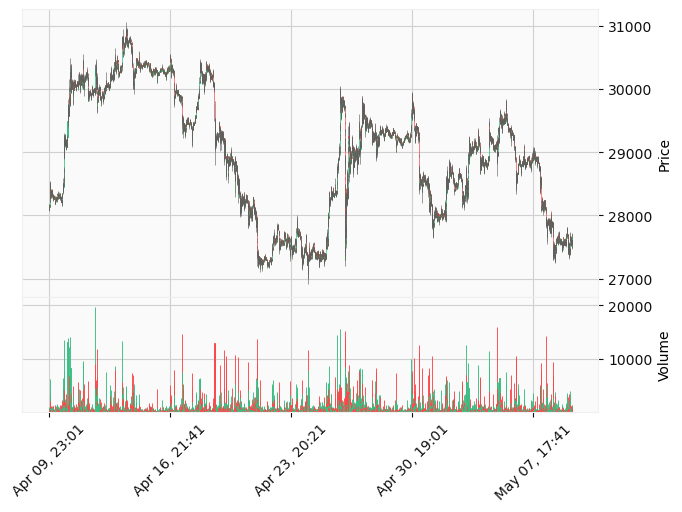

In [12]:
import mplfinance as mpf

mpf.plot(df, type='candle', volume=True, style='yahoo', type='line')

In [13]:

df2mean = pd.DataFrame()
df2mean.index = fu_df.index
df2mean['Mean'] = fu_df[['High', 'Low']].mean(axis=1)
df2mean


,Mean
time,
2023-04-09 23:01:00,28129.85
2023-04-09 23:02:00,28136.80
2023-04-09 23:03:00,28144.40
2023-04-09 23:04:00,28138.80
2023-04-09 23:05:00,28122.75
...,...
2023-05-09 22:56:00,27655.30
2023-05-09 22:57:00,27647.85
2023-05-09 22:58:00,27684.35


<Axes: xlabel='time'>

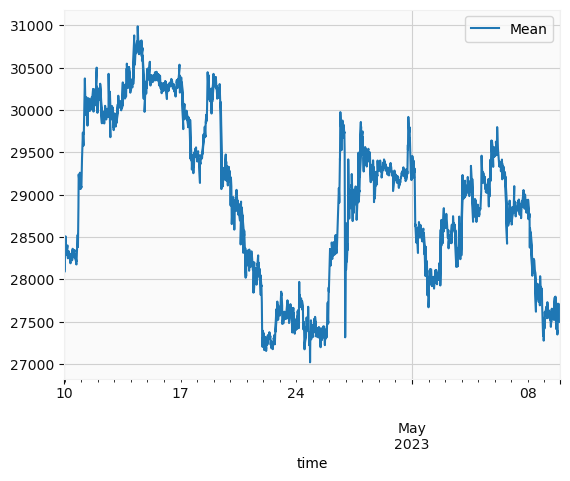

In [14]:
df2mean.plot()


In [ ]:
ba_df['Mean'] = ba_df[['High', 'Low']].mean(axis=1)
ba_df

,Open,High,Low,Close,Volume,Mean
time,,,,,,
2023-05-08 19:23:00,27865.48,27886.79,27865.48,27885.56,44.53964,27876.135
2023-05-08 19:24:00,27885.56,27889.93,27879.48,27889.93,27.89008,27884.705
2023-05-08 19:25:00,27889.92,27906.42,27889.92,27906.42,31.20741,27898.170
2023-05-08 19:26:00,27906.41,27909.42,27893.56,27906.78,27.32208,27901.490
2023-05-08 19:27:00,27906.79,27908.89,27901.79,27908.88,13.97784,27905.340
...,...,...,...,...,...,...
2023-05-08 21:18:00,27519.26,27550.00,27519.25,27539.82,80.77354,27534.625
2023-05-08 21:19:00,27539.83,27577.76,27532.91,27571.78,86.40093,27555.335
2023-05-08 21:20:00,27571.78,27595.84,27521.70,27527.24,154.83028,27558.770


In [15]:
fu_df['Mean'] = fu_df[['High', 'Low']].mean(axis=1)
fu_df

,Open,High,Low,Close,Volume,Mean
time,,,,,,
2023-04-09 23:01:00,28131.7,28131.7,28128.0,28129.6,116.894,28129.85
2023-04-09 23:02:00,28129.5,28144.1,28129.5,28139.0,276.701,28136.80
2023-04-09 23:03:00,28139.0,28149.9,28138.9,28146.6,291.525,28144.40
2023-04-09 23:04:00,28146.5,28149.7,28127.9,28127.9,129.835,28138.80
2023-04-09 23:05:00,28127.5,28127.5,28118.0,28118.1,182.836,28122.75
...,...,...,...,...,...,...
2023-05-09 22:56:00,27644.7,27670.0,27640.6,27655.0,483.346,27655.30
2023-05-09 22:57:00,27655.0,27657.6,27638.1,27654.8,251.330,27647.85
2023-05-09 22:58:00,27654.6,27714.2,27654.5,27700.5,1124.732,27684.35


In [ ]:
#split = 0.85
#i_split = int(len(fu_df) * split)
#cols = ["Close", "Volume"]
#data_train = fu_df.get(cols).values[:i_split]
#data_test = fu_df.get(cols).values[i_split:]
#print(len(fu_df), len(data_train), len(data_test))

In [ ]:
#data_train.shape, data_test.shape, data_train

In [16]:
fu_mean_df = fu_df['Mean'].values
fu_mean_df = fu_mean_df.reshape(-1, 1)
fu_mean_df

array([[28129.85],
       [28136.8 ],
       [28144.4 ],
       ...,
       [27684.35],
       [27696.2 ],
       [27703.45]])

In [29]:
import numpy as np

fu_dataset_train = np.array(fu_mean_df[:int(fu_mean_df.shape[0]*0.8)])
fu_dataset_test = np.array(fu_mean_df[int(fu_mean_df.shape[0]*0.8):])
fu_dataset_test

array([[28305.15],
       [28317.6 ],
       [28331.85],
       ...,
       [27684.35],
       [27696.2 ],
       [27703.45]])

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
fu_dataset_train = scaler.fit_transform(fu_dataset_train)
fu_dataset_test = scaler.transform(fu_dataset_test)
fu_dataset_train.shape, fu_dataset_test.shape

((34560, 1), (8640, 1))

In [19]:
import util

x_train, y_train = util.create_dataset(fu_dataset_train)
x_test, y_test = util.create_dataset(fu_dataset_test)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((34510, 50), (34510,), (8590, 50), (8590,))

In [20]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

x_train.shape, x_test.shape

((34510, 50, 1), (8590, 50, 1))

# Training

In [21]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)), 
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.LSTM(units=96,return_sequences=True),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.LSTM(units=96,return_sequences=True),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.LSTM(units=96, return_sequences=False),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(units=1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 96)            37632     
                                                                 
 dropout (Dropout)           (None, 50, 96)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_1 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_2 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_3 (LSTM)               (None, 96)                7

In [22]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

x_train.shape, x_test.shape

((34510, 50, 1), (8590, 50, 1))

In [23]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [24]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_prediction.h5')

Epoch 1/50
1079/1079 [==============================] - 42s 17ms/step - loss: 0.0025 - accuracy: 5.7954e-05
Epoch 2/50
1079/1079 [==============================] - 18s 17ms/step - loss: 0.0012 - accuracy: 5.7954e-05
Epoch 3/50
1079/1079 [==============================] - 18s 17ms/step - loss: 8.5879e-04 - accuracy: 5.7954e-05
Epoch 4/50
1079/1079 [==============================] - 18s 17ms/step - loss: 7.0635e-04 - accuracy: 5.7954e-05
Epoch 5/50
1079/1079 [==============================] - 18s 17ms/step - loss: 6.0217e-04 - accuracy: 5.7954e-05
Epoch 6/50
1079/1079 [==============================] - 18s 17ms/step - loss: 5.2731e-04 - accuracy: 5.7954e-05
Epoch 7/50
1079/1079 [==============================] - 18s 17ms/step - loss: 4.7557e-04 - accuracy: 5.7954e-05
Epoch 8/50
1079/1079 [==============================] - 18s 17ms/step - loss: 4.6177e-04 - accuracy: 5.7954e-05
Epoch 9/50
1079/1079 [==============================] - 18s 17ms/step - loss: 4.2997e-04 - accuracy: 5.7954e-05


In [25]:
model = tf.keras.models.load_model('stock_prediction.h5')

In [28]:
x_test.shape, x_test

((8590, 50, 1),
 array([[[0.32378877],
         [0.3269255 ],
         [0.33051573],
         ...,
         [0.33715452],
         [0.33711673],
         [0.34283591]],
 
        [[0.3269255 ],
         [0.33051573],
         [0.33239273],
         ...,
         [0.33711673],
         [0.34283591],
         [0.35239727]],
 
        [[0.33051573],
         [0.33239273],
         [0.33449649],
         ...,
         [0.34283591],
         [0.35239727],
         [0.35816684]],
 
        ...,
 
        [[0.13561009],
         [0.13288907],
         [0.13417399],
         ...,
         [0.15732786],
         [0.16006147],
         [0.15818448]],
 
        [[0.13288907],
         [0.13417399],
         [0.1336953 ],
         ...,
         [0.16006147],
         [0.15818448],
         [0.16738051]],
 
        [[0.13417399],
         [0.1336953 ],
         [0.13210803],
         ...,
         [0.15818448],
         [0.16738051],
         [0.17036608]]]))

269/269 [==============================] - 3s 8ms/step


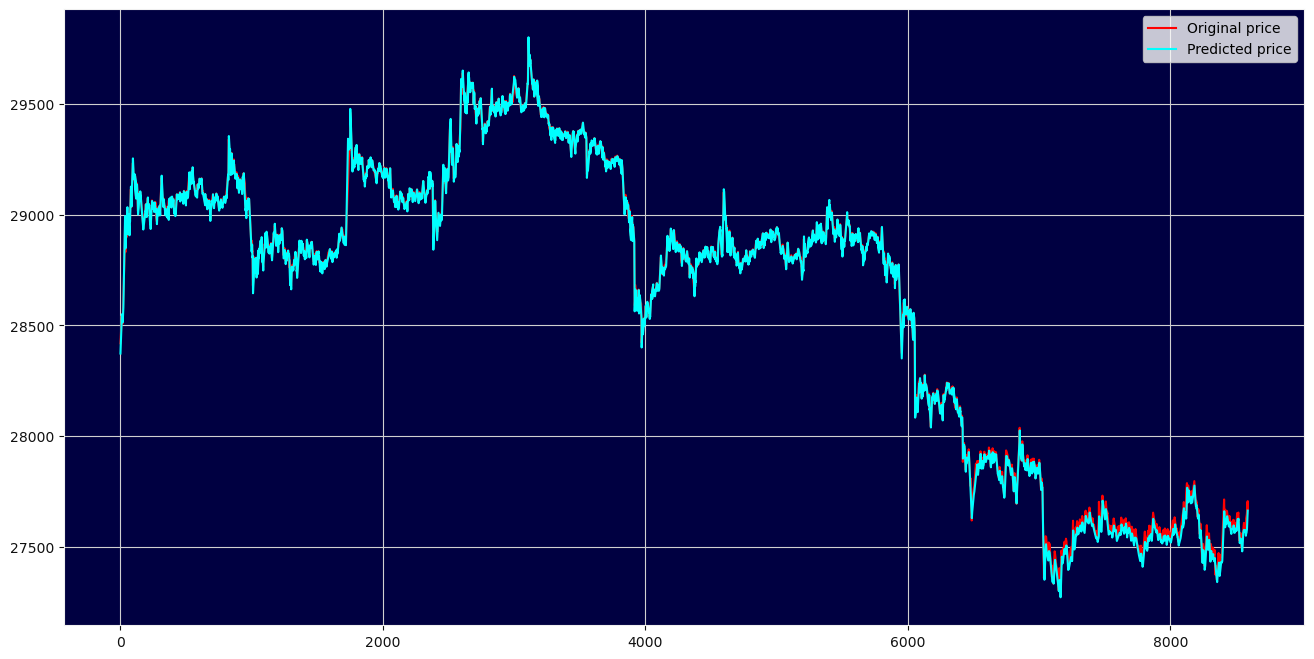

In [26]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()

In [ ]:
#import tensorflow as tf
#
#sequence_length = 50; input_dim = 2; batch_size = 32; epoch = 2
#
#model = tf. keras.Sequential([
#    tf.keras.layers.LSTM(100, input_shape=(sequence_length-1, input_dim), return_sequences=True), 
#    tf.keras.layers.Dropout(.2),
#    tf.keras.layers.LSTM(100, return_sequences=True),
#    tf.keras.layers.LSTM(100, return_sequences=False),
#    tf.keras.layers.Dropout(.2),
#    tf.keras.layers.Dense(1, activation='linear')
#])
#
#model.summary()

In [ ]:
#model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(), metrics=['accuracy'])